# Gradient Descent

First we will begin by giving a random functiona and demonstrating the math behind the Gradient descent transformation. After the calculations we will see a 2D visual of the Gradient Descent.

At the end we will apply our Gradient Descent function to Linear data and apply learning steps and iterations for a better fitting model.

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Create a random function and show a 2d visual

Starting with the random function: (X-5)^2 + 2

In [283]:
random_function = lambda x: ((x - 5)**2) + 2
xx = range(0,12)
yy = []
for i in xx:
    yy.append(i**2 - 10*i + 27) #the factor

Create functions for F, derivative of F and the Gradient descent function from scratch. Base the F function on the random function above.

In [284]:
def f(x):
    return (x-5)**2 + 2

def d_f(x, e):
    return (f(x + e) - f(x))/e

def gradient_descent_jr(x0, a, iterations):
    points = np.asarray([(x0, f(x0))])
    for _ in range(1,iterations):
        x0 = x0 - np.dot(a, d_f(x0, 0.001))
        points = np.append(points, np.array( [[x0, f(x0)]] ) , axis=0) 
    return points

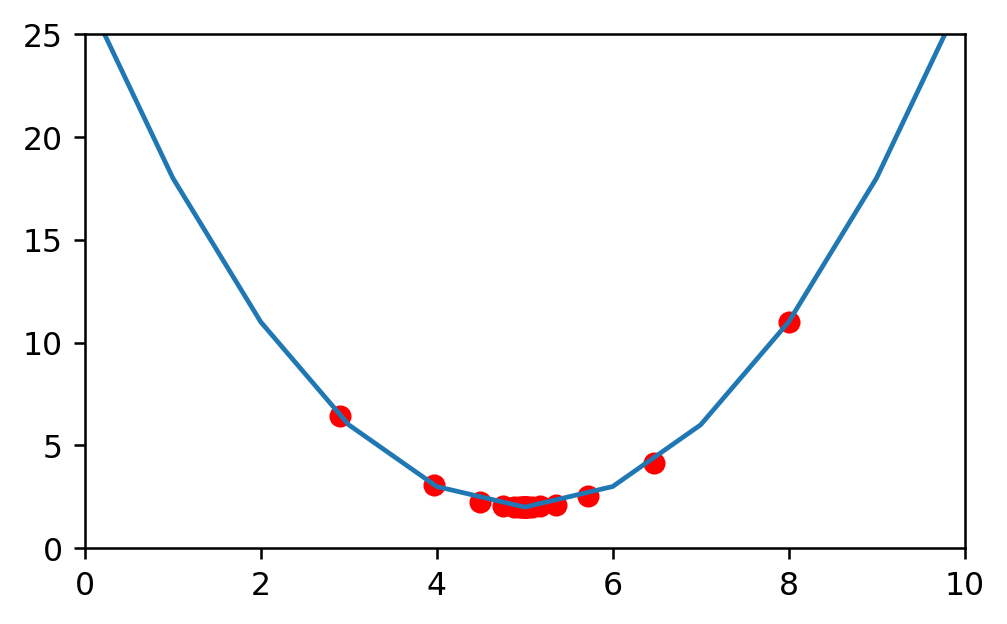

In [285]:
gd = gradient_descent_jr(8, 0.85, 20)
plt.figure(figsize=(5,3))
plt.plot(xx,yy)

plt.scatter(gd[0:, :1],
            gd[0:, 1:],
            color = 'red')

plt.xlim(0,10)
plt.ylim(0,25)
plt.show()

### Now it is time to use the gradient descent on some linear data

In [286]:
data = pd.read_csv('data.csv')
data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [287]:
x = data.Height
y = data.Weight

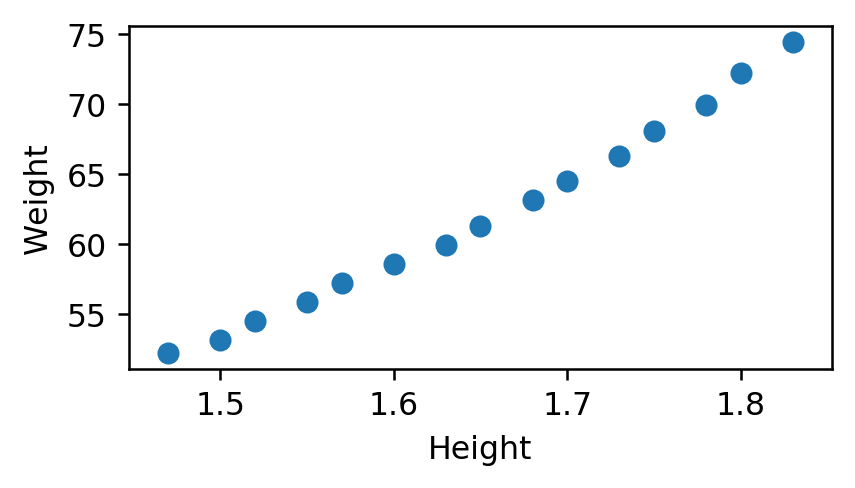

In [288]:
plt.figure(figsize=(4,2))
plt.scatter(x,y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Gradient descent function

In [289]:
def gradient_descent(X, y, learning_rate, nbr_iterations):
    theta0 = 0
    theta1 = 0
    size = len(X)
    for i in range(nbr_iterations):
        ypred = theta0 + theta1 * X
        d_theta_0 = (2/size) * sum(ypred - y) 
        d_theta_1 = (2/size) * sum(X * (ypred - y)) 
        
        
        theta0 -= (learning_rate * d_theta_0)
        theta1 -= (learning_rate * d_theta_1)
        
    plt.figure(figsize=(3,2))    
    plt.scatter(X, y)
    plt.plot([min(X),max(X)],[min(ypred),max(ypred)], color='red')
    plt.show()    
    return theta0, theta1

### We can test the Gradient descent function using many types of learning rates and iterations for a better fit, let's play around with the function and slowly move up to a best fitting line.

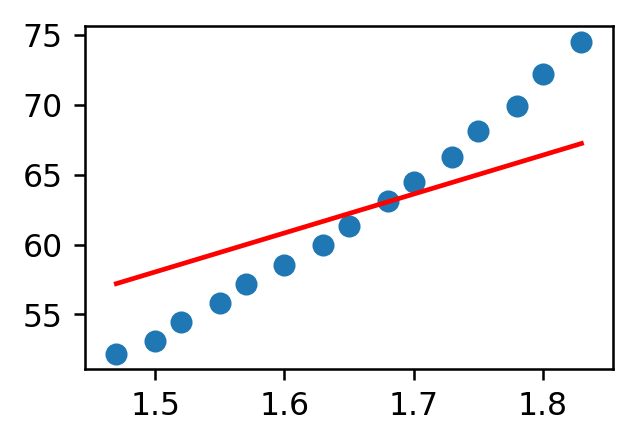

(16.30588744286013, 27.82283208117165)

In [290]:
gradient_descent(x, y, learning_rate=0.01, nbr_iterations=100)

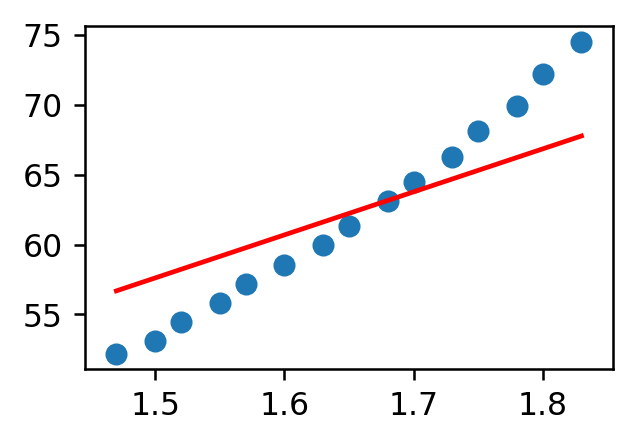

(11.478708323891844, 30.75373304378145)

In [291]:
gradient_descent(x, y, learning_rate=0.03, nbr_iterations=500)

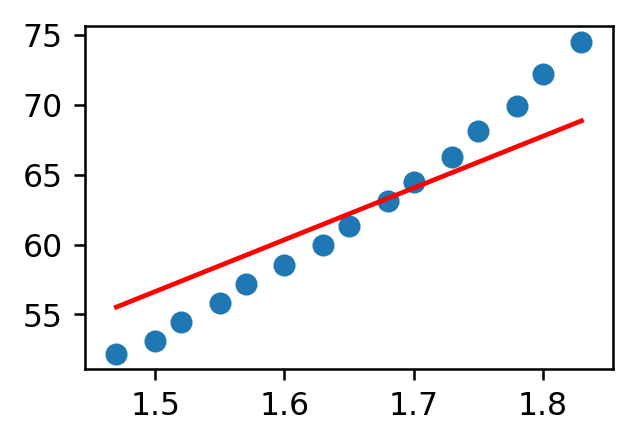

(1.1588869727548676, 36.98524964006373)

In [292]:
gradient_descent(x, y, learning_rate=0.05, nbr_iterations=1000)

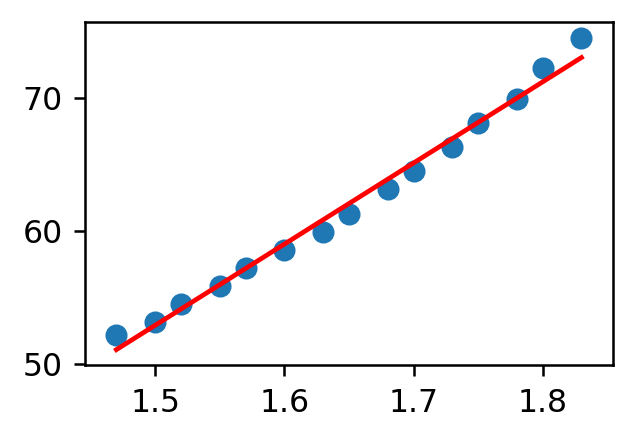

(-38.48349058284432, 60.922886276243275)

In [293]:
gradient_descent(x, y, learning_rate=0.07, nbr_iterations=10000)

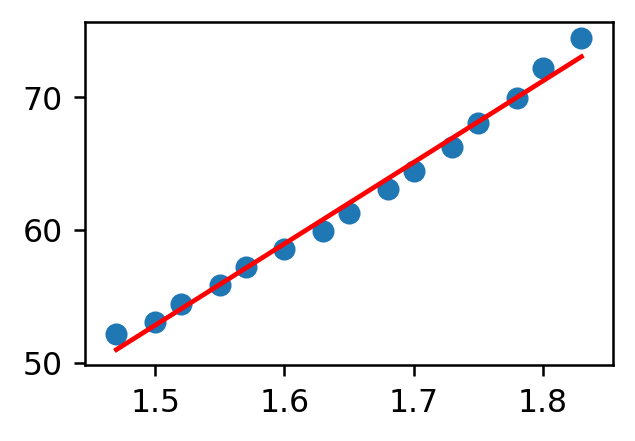

(-39.06032872259556, 61.27120397661049)

In [294]:
gradient_descent(x, y, learning_rate=0.08, nbr_iterations=20000)

References:

https://jairiidriss.medium.com/gradient-descent-algorithm-from-scratch-using-python-2b36c1548917

https://www.kaggle.com/tmcketterick/heights-and-weights?select=data.csv